# Pharmaceutical Drug Sales Analysis

## Project Overview

This project focuses on analyzing pharmaceutical sales data to uncover trends in revenue, units sold and regional performance.
We will utilize SQL for data extraction and Python for analysis and visualization.


## Dataset

Source: [Kaggle – Sample Pharmaceutical Drug Sales Dataset](https://www.kaggle.com/datasets/jewelzufo/sample-pharmaceutical-drug-sales)

- The dataset contains information about :

 - **Drug Name**
 - **Manufacturer**
 - **Dosage Form**
 - **Strength**
 - **Package Size**
 - **Units Sold** 
 - **Revenue**
 - **Sale Date**
 - **Region**
 - **Sales Representative**
 - **Customer Type**


 ## Tools used

  - **SQL(MySQL Workbench)** for data querying, storage, cleaning and manipulation
  - **Python (Pandas, Matplotlib, Seaborn)** for data analysis and visualization
  - **Jupyter Notebook** for documenting the analysis process and findings

  ## Objective

- Analyze revenue across different regions and customer segments to identify high-performing areas.
- Identify top-selling drugs and their sales trends over time.
- Explore monthly sales patterns to inform marketing strategies.
- Forecast revenue for the next 6 months based on historical data.
- Provide visual insights to support decision-making.



In [3]:
## Import necessary libraries

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LinearRegression


## SQL queries and Visualizations


### Query 1: Total Revenue by Region
This query was executed in MySQL Workbench, and the results were exported to a CSV file for further analysis in Python.
- **SQL:** Performed data aggregation to calculate total revenue by region.
- **Python:** Created a bar chart to visualize revenue distribution across regions.

'''SQL

 SELECT region, SUM(revenue) AS total_revenue

 FROM drug_sales

 GROUP BY region
 
 ORDER BY total_revenue DESC;

C:\Users\lindile nkosi\AppData\Local\Temp\ipykernel_9312\263607114.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tot_revenue, x='region', y='total_revenue', palette='viridis')


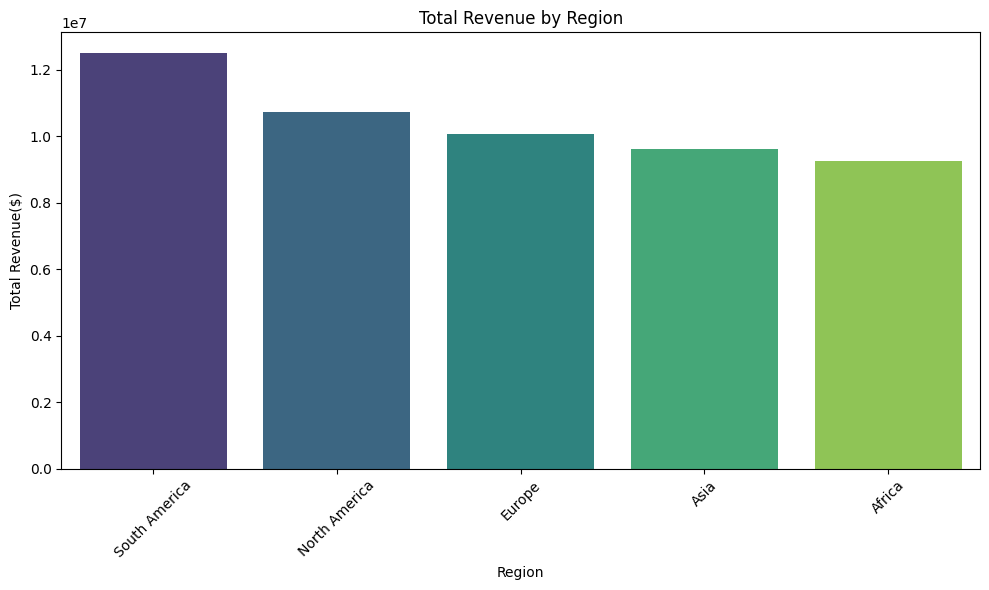

In [15]:
# Load the CSV file containing the results of the SQL query
tot_revenue = pd.read_csv('total_revenue_by_region.csv')

# Display the first few rows of the dataframe
tot_revenue.head()

# Visualize the total revenue by region
plt.figure(figsize=(10, 6))
sns.barplot(data=tot_revenue, x='region', y='total_revenue', palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Images/total_revenue_by_region.png')
plt.show()
plt.close()

**Insights:**

-The bar chart illustrates the total revenue generated from different regions.

-South America is the top-performing region, contributing the highest revenue.

-North America and Europe also show strong revenue figures, indicating robust market presence.

-Regions like Africa and Asia have lower revenue, suggesting potential areas for growth and market expansion.


### Query 2:  Top 5 Best_Selling Drugs by Units Sold
This query was executed in MySQL Workbench to identify the top 5 best-selling drugs based on total units sold.
The results were exported to a CSV file for further analysis in Python.
- **SQL:** Used aggregation functions to sum units sold per drug and sorted the results to get the top 5 drugs.
- **Python:** Created a horizontal bar chart to visualize the top-selling drugs.

''' SQL

SELECT drug_name, SUM(units_sold) AS total_units

FROM drug_sales

GROUP BY drug_name

ORDER BY total_units DESC

LIMIT 5;

C:\Users\lindile nkosi\AppData\Local\Temp\ipykernel_9312\3086166258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_drugs, x='total_units', y='drug_name', palette='magma')


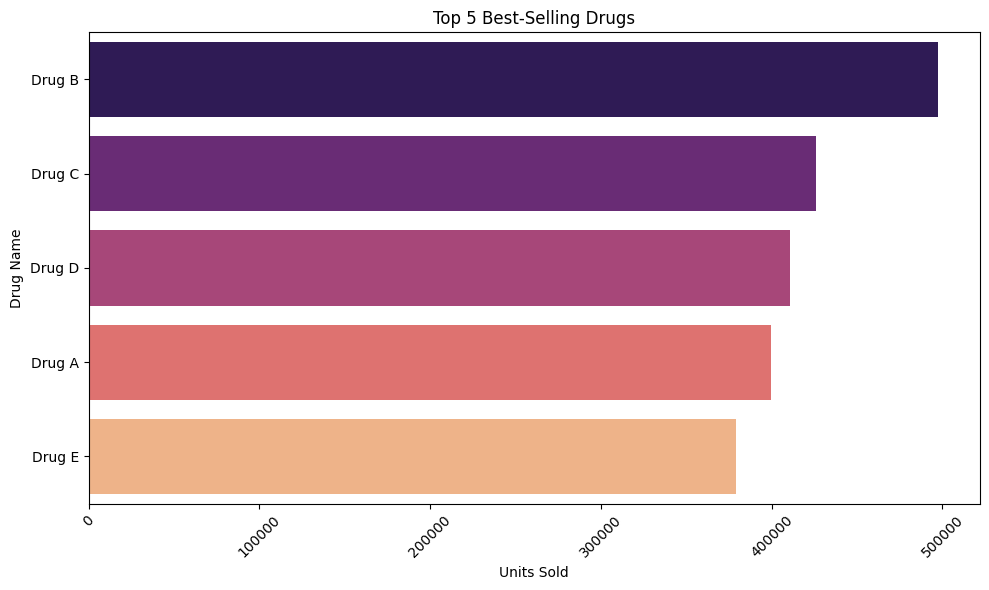

In [14]:
# Load the CSV file containing top 10 drugs by sales data
top_drugs = pd.read_csv('top_5_drugs.csv')

# Display the first few rows of the dataframe
top_drugs.head()

# Visualize the top 5 drugs by sales amount
plt.figure(figsize=(10, 6))
sns.barplot(data=top_drugs, x='total_units', y='drug_name', palette='magma')
plt.title('Top 5 Best-Selling Drugs')
plt.xlabel('Units Sold')
plt.ylabel('Drug Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Images/top_10_best_selling_drugs.png')
plt.show()
plt.close()

**Insights:**

-The horizontal bar chart highlights the top 5 best-selling drugs based on units sold.

-Drug B leads the sales, followed by Drug C, Drug A and Drug D, indicating their popularity in the market.

-Drugs like Drug E have lower sales, suggesting potential areas for marketing focus or inventory adjustment.

### Query 3: Monthly Revenue Trends
This query was executed in MySQL Workbench to analyze monthly revenue trends over the past year
The results were exported to a CSV file for further analysis in Python.

- **SQL:** Extracted month and year from sale date and aggregated total revenue per month.
- **Python:** Created a line chart to visualize monthly revenue trends.

 '''SQL

 SELECT DATE_FORMAT(sales_date, '%Y-%m) AS month, SUM (revenue) AS monthly_revenue
 
 FROM drug_sales

 GROUP BY month
 
 ORDER BY month;

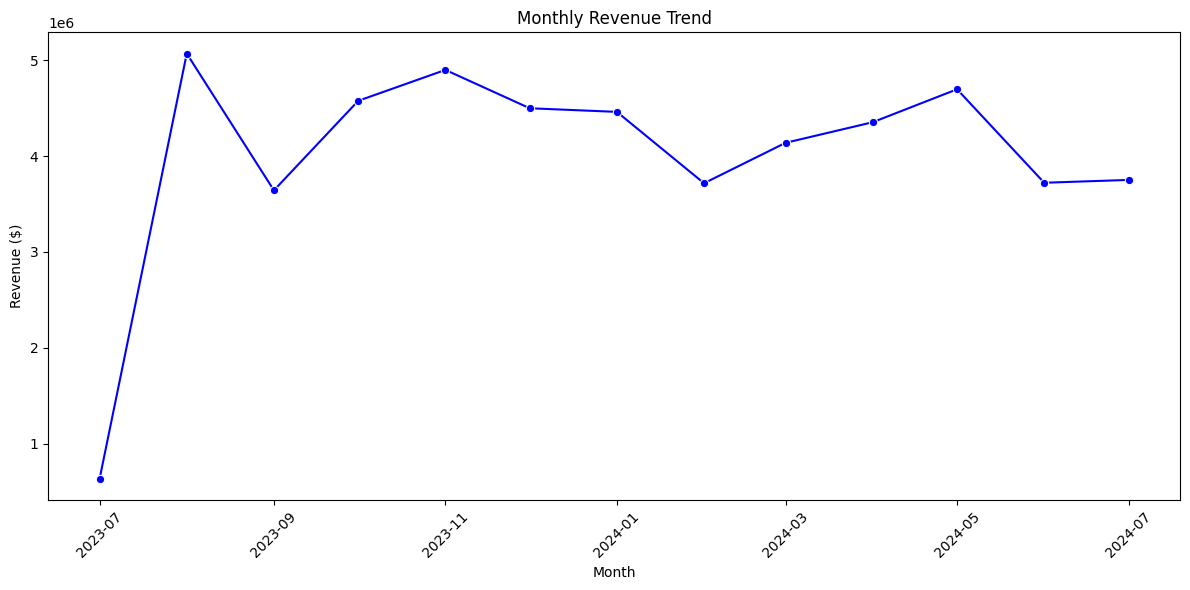

In [13]:
#Load the CSV file containing monthly sales trends data
monthly_revenue = pd.read_csv('monthly_revenue.csv')

# Display the first few rows of the dataframe
monthly_revenue.head()

# Convert 'sale_month' to datetime format for better plotting
monthly_revenue['month'] = pd.to_datetime(monthly_revenue['month'])

# Visualize the monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month', y='monthly_revenue', marker='o', color='b')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Images/monthly_revenue_trend.png')
plt.show()
plt.close()

**Insights:**

-Revenue peaks in August 2023, indicating a strong sales period, possibly due to seasonal demand or promotional activities.

-A noticeable dip in September 2023 suggests a slowdown in sales, which could be due to market factors or reduced demand.

-Revenue gradually increases again towards the end of the year, with another dip in February 2024, indicating potential seasonal fluctuations in sales.

-Identifying these trends can help in planning marketing strategies and inventory management.


### Query 4: Revenue by Customer Type
This query was executed in MySQL Workbench to compare analyze how different customer segments contribute to overall revenue.
The results were exported to a CSV file for further analysis in Python.
- **SQL:** Grouped sales data by customer type and calculated total revenue for each segment.
- **Python:** Created a bar chart to visualize revenue distribution by customer type.

 '''SQL

 SELECT customer_type, SUM (revenue) AS total_revenue
 
 FROM drug_sales

 GROUP BY customer_type
 
 ORDER BY total_revenue desc;

C:\Users\lindile nkosi\AppData\Local\Temp\ipykernel_9312\2573448531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_revenue, x='customer_type', y='total_revenue', palette='coolwarm')
) missing from font(s) DejaVu Sans.l\Temp\ipykernel_9312\2573448531.py:14: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.l\Temp\ipykernel_9312\2573448531.py:15: UserWarning: Glyph 13 (
  plt.savefig('Images/revenue_by_customer_type.png')
) missing from font(s) DejaVu Sans.l\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


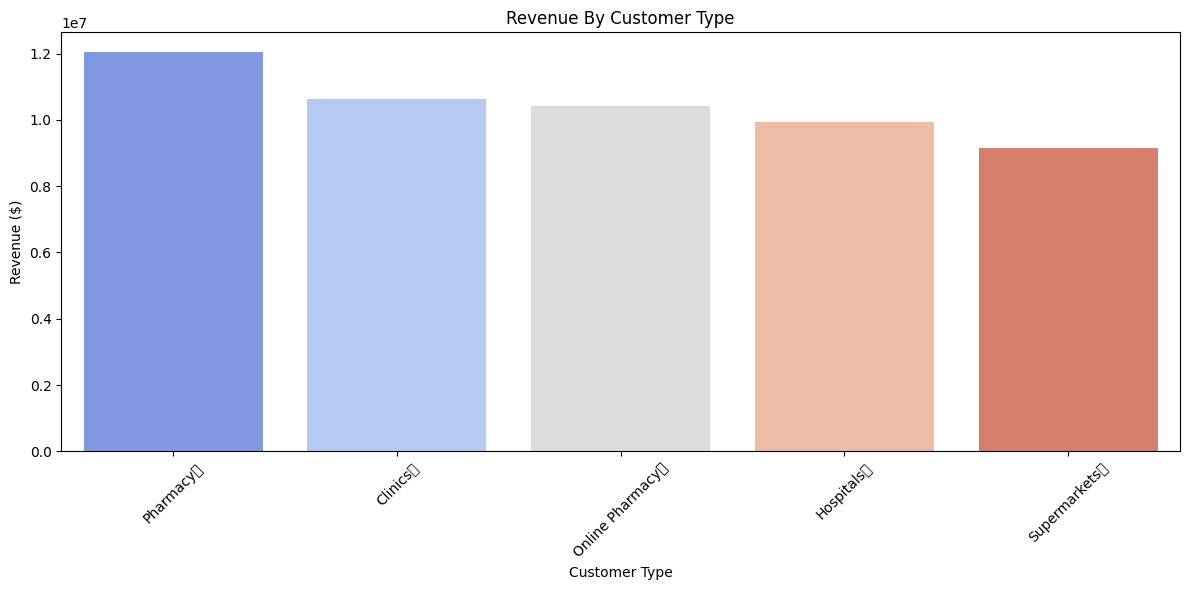

In [12]:
#Load the CSV file containing total revenue by customer type data
total_revenue = pd.read_csv('customer_type_revenue.csv')

# Display the first few rows of the dataframe
total_revenue.head()

# Visualize the total revenue trend
plt.figure(figsize=(12, 6))
sns.barplot(data=total_revenue, x='customer_type', y='total_revenue', palette='coolwarm')
plt.title('Revenue By Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Images/revenue_by_customer_type.png')
plt.show()
plt.close()

**Insights:**

-Pharmacies contribute the highest revenue, indicating their significant role in drug sales.

-Clinics, Online Pharmacy, Hospitals and Supermarkets also contribute notably, reflecting their importance in the healthcare supply chain.

-This insight can guide targeted marketing and sales strategies to maximize revenue from key customer segments.

### Query 5: Revenue By Manufacturer
This query was executed in MySQL Workbench to analyze revenue distribution across different drug manufacturers.
The results were exported to a CSV file for further analysis in Python.

- **SQL:** Grouped sales data by manufacturer and calculated total revenue for each.
- **Python:** Created a bar chart to visualize revenue distribution by manufacturer.

 '''SQL

 SELECT manufacturer, SUM (revenue) AS total_revenue
 
 FROM drug_sales

 GROUP BY manufacturer
 
 ORDER BY total_revenue DESC;

C:\Users\lindile nkosi\AppData\Local\Temp\ipykernel_9312\3279041278.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=manufacturer_revenue, x='manufacturer', y='total_revenue', palette='Set2')


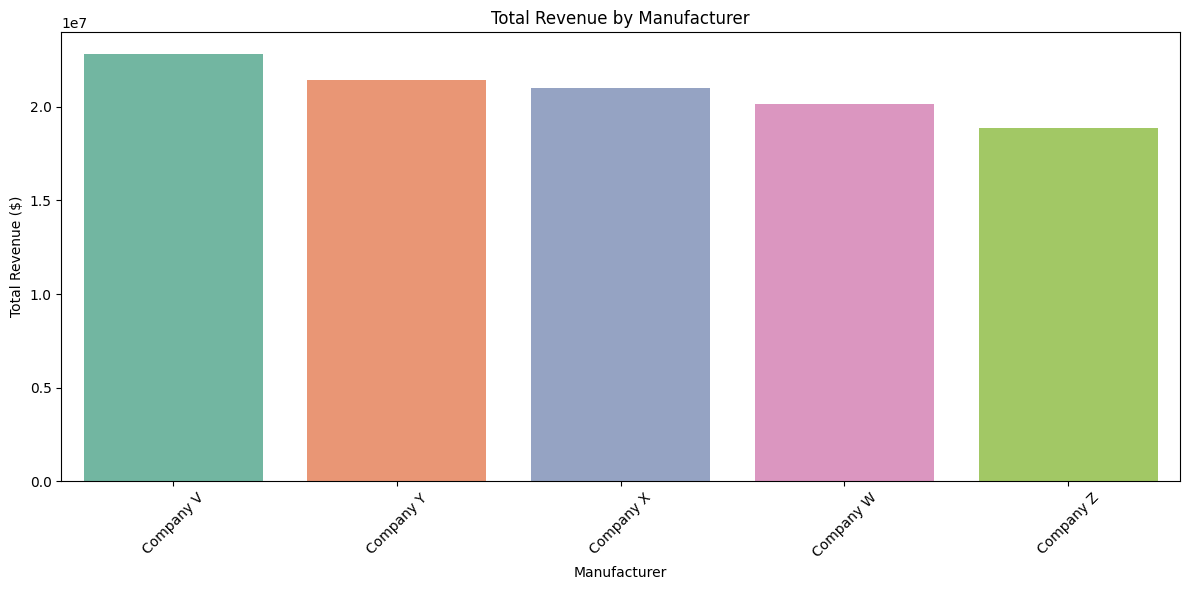

In [11]:
# Plot for total revenue by manufacturer

# Load the CSV file containing total revenue by manufacturer data
manufacturer_revenue = pd.read_csv('manufacturer_revenue.csv')

# Display the first few rows of the dataframe
manufacturer_revenue.head()

# Visualize the total revenue by manufacturer
plt.figure(figsize=(12, 6))
sns.barplot(data=manufacturer_revenue, x='manufacturer', y='total_revenue', palette='Set2')
plt.title('Total Revenue by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Images/total_revenue_by_manufacturer.png')
plt.show()
plt.close()

**Insights:**

-Manufacturer V leads in revenue generation, followed by the rest of the manufacturers contributing moderately to the overall revenue.

-This insight can help in identifying key manufacturers contributing to sales and potential partnerships.

## Forecasting Monthly Revenue

We use historical monthly revenue data to predict future revenue for the next 6 months using a simple linear regression model.

c:\Users\lindile nkosi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lindile nkosi\AppData\Local\Temp\ipykernel_9312\611227591.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(start=forecast_data['month'].iloc[-1] + pd.DateOffset(months=1), periods=6, freq='M')


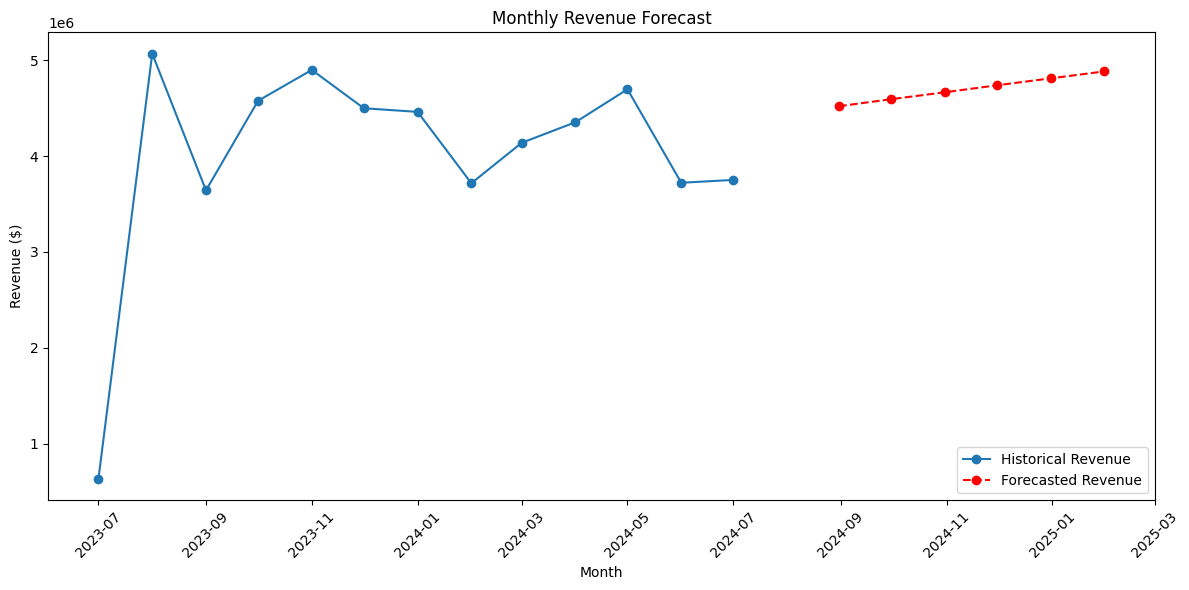

In [10]:
# Prepare the data for forecasting
forecast_data = monthly_revenue.copy()

# Create a numeric representation of months
forecast_data['month_num'] = np.arange(len(forecast_data))

# Define features and target variable
X = forecast_data[['month_num']]
y = forecast_data['monthly_revenue']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict future revenue for the next 6 months
future_months = np.arange(len(forecast_data), len(forecast_data) + 6).reshape(-1, 1)
future_revenue = model.predict(future_months)

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_data['month'], forecast_data['monthly_revenue'], marker='o', label='Historical Revenue')
future_months = pd.date_range(start=forecast_data['month'].iloc[-1] + pd.DateOffset(months=1), periods=6, freq='M')
plt.plot(future_months, future_revenue, marker='o', linestyle='--', color='r', label='Forecasted Revenue')
plt.title('Monthly Revenue Forecast')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('Images/monthly_revenue_forecast.png')
plt.show()
plt.close()

### Monthly Revenue Forecast

This chart shows the forecasted monthly revenue for the next 6 months based on historical data. The blue line represents the actual historical revenue, while the red line indicates the forecasted revenue generated by the linear regression model.



**Observations:**

-Shows a positive trend in revenue growth  for the next 6 months.

-Indicates potential increase in sales and market demand.

-This analysis can help guide business strategies and decision-making for future growth.


## Conclusion

This project analyzed pharmaceutical drug sales data to uncover key insights and trends.
We examined revenue distribution by region, customer type, manufacturers, identified top-selling drugs and analyzed monthly revenue trends. Additionally, we forecasted future revenue using a linear regression model.

### Key Findings:

-**Top-selling drugs** and **high-revenue regions** were identified, providing insights for targeted marketing.

-**Manufacturers** contributing significantly to sales were highlighted.

-**Monthly revenue trends** highlighted seasonal patterns, aiding in inventory and sales planning.

-**Customer segments** contributing most to revenue were identified, guiding sales strategies.

-**The revenue forecast** indicates potential growth, assisting in strategic planning.

Overall, the analysis provides valuable insights for optimizing sales strategies and improving business performance in the pharmaceutical sector.